## Machine Learning A-Z™: Hands-On Python & R In Data Science

### Kirill Eremenko, Hadelin de Ponteves, SuperDataScience Team

https://www.udemy.com/machinelearning/

Part 2: Data Preprocessing Template

**Section 6: Polynomial Regression**

Scenario: 
- Company wants to hire new candidate and needs to predict salary based on level of position
- Candidate said his previous salary was 160K
- Predict if candidate statement this is true

---
**Polynomial Regression**

- Polynominal Linear regression == y = b0 + b1*x1 + b2*x^2 + b3*x^3 + ....
- It is still linear the coefficients (b0, b1, b2, b3) are linear
- y = dependent variable
- b0 = slope of the regression line
- b = y intercept
- we will build nonlinear regressors
---

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [6]:
#let's take a look at the dataset
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [9]:
#let's create matrix of features
x = dataset.iloc[:, 1:2].values
print(x)
#here the matrix contains different types
#we need to encode our categorical table

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [10]:
#create the dependent variable vector (y-value)
y = dataset.iloc[:,2].values
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [11]:
#Fitting linear regression to the dataset
##the polynomial regression machine is learning on the training set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
##fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)

In [14]:
#create a new linear regression to fit into new x_poly matrix
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

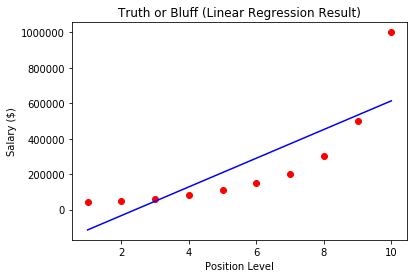

In [15]:
#our polynomial is ready to reveal truth or bluff
# Visualizing the true observation results
## matplotlib.pplot will be used for plotting
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color ='blue') # no need to change
plt.title('Truth or Bluff (Linear Regression Result)')
plt.xlabel('Position Level')
plt.ylabel('Salary ($)')
plt.show() #specifies the end of graph and we are ready to plot/display


**Observation:** The regression line does not fit the observation points,hence not a good predictor, we need a better model => a nonlinear model is needed

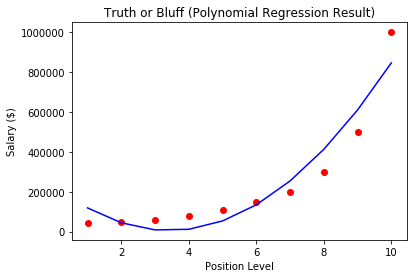

In [17]:
# Visualizing the Polynomial results
## matplotlib.pplot will be used for plotting
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color ='blue') # no need to change
plt.title('Truth or Bluff (Polynomial Regression Result)')
plt.xlabel('Position Level')
plt.ylabel('Salary ($)')
plt.show() #specifies the end of graph and we are ready to plot/display

**Observation:** The polynomial regression better fits the observation points, here the CEO is predicted to have a salary = $900K // employee said he was paid 100K  => close to the data

---

In [18]:
#let's increase the degree of the polynomial to better fit our result
poly_reg2 = PolynomialFeatures(degree = 3)
x_poly2 = poly_reg2.fit_transform(x)

lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_poly2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

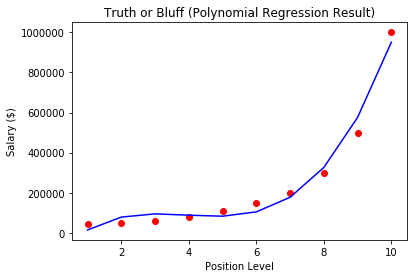

In [19]:
# Visualizing the Polynomial results
## matplotlib.pplot will be used for plotting
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg2.fit_transform(x)), color ='blue') # no need to change
plt.title('Truth or Bluff (Polynomial Regression Result)')
plt.xlabel('Position Level')
plt.ylabel('Salary ($)')
plt.show() #specifies the end of graph and we are ready to plot/display

**Observation:** The polynomial regression better fits the observation points, the prediction for CEO salary is much better.

---

In [26]:
## let's increase the degree of the polynomial (= 4) to better fit our result
poly_reg3 = PolynomialFeatures(degree = 4)
x_poly3 = poly_reg3.fit_transform(x)

lin_reg_4 = LinearRegression()
lin_reg_4.fit(x_poly3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

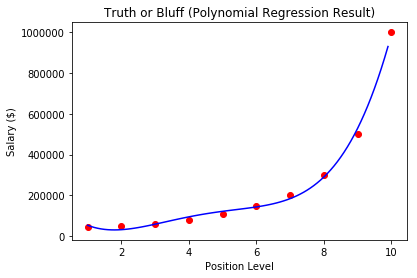

In [27]:
# Visualizing the Polynomial results
## matplotlib.pplot will be used for plotting
x_grid = np.arange(min (x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_4.predict(poly_reg3.fit_transform(x_grid)), color ='blue') # no need to change
plt.title('Truth or Bluff (Polynomial Regression Result)')
plt.xlabel('Position Level')
plt.ylabel('Salary ($)')
plt.show() #specifies the end of graph and we are ready to plot/display

**Observation:** The polynomial regression accurately fits the observation points, the prediction for CEO salary is on point. By adding x_grid, we have a more continuous curve. HR mentioned that employee is level 6.5. Let's predict the employee candidate salary.

---

In [28]:
## Predict a new result with linear regression
lin_reg.predict([[6.5]])

array([330378.78787879])

**Answer:** 330K: => too high!

---

In [ ]:
## Predict a new result with polynomial regression
lin_reg_4.predict(poly_reg.fit_transform([[6.5]]))

**Answer:** 159K: => close to employee statement!

---

**Verdit:**  The polynomial regression model, does a great job in predicting the tentative employee's previous salary and confirms that the candidate is telling the truth